# Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Prepare the Data

> Split the data in train and test

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

> Verify the data type

> Characteristic Matrix

In [ ]:
X_train[4]

array([[[170, 180, 198],
        [168, 178, 196],
        [177, 185, 203],
        ...,
        [162, 179, 215],
        [158, 178, 214],
        [157, 177, 212]],

       [[168, 181, 198],
        [172, 185, 201],
        [171, 183, 200],
        ...,
        [159, 177, 212],
        [156, 176, 211],
        [154, 174, 209]],

       [[154, 170, 186],
        [149, 165, 181],
        [129, 144, 162],
        ...,
        [161, 178, 214],
        [157, 177, 212],
        [154, 174, 209]],

       ...,

       [[ 74,  84,  80],
        [ 76,  85,  81],
        [ 78,  85,  82],
        ...,
        [ 71,  75,  78],
        [ 68,  72,  75],
        [ 61,  65,  68]],

       [[ 68,  76,  77],
        [ 69,  77,  78],
        [ 72,  79,  78],
        ...,
        [ 76,  80,  83],
        [ 71,  75,  78],
        [ 71,  75,  78]],

       [[ 67,  75,  78],
        [ 68,  76,  79],
        [ 69,  75,  76],
        ...,
        [ 75,  79,  82],
        [ 71,  75,  78],
        [ 73,  77,  80]]

## Exploring the dataset

> Veryfing an image example plot

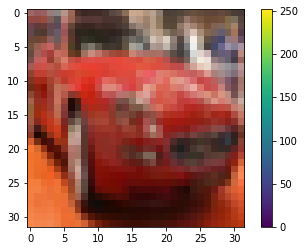

In [ ]:
plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

> Verifying number of classes

In [ ]:
num_classes = np.unique(y_train)
num_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

>Plot a grid of 3x3 images

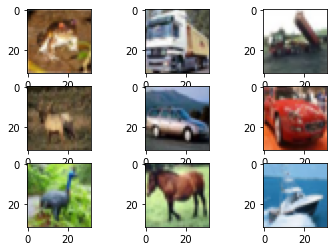

In [ ]:
for i in range(9):
  plt.subplot(331+i)
  plt.imshow(X_train[i])

## Normalizing the Data

In [ ]:
X_train, X_test = X_train/255, X_test/255

> Verifying the normalized dataset

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

> Change to one-hot encoding

In [ ]:
y_train = to_categorical( y_train )
y_test = to_categorical( y_test )

> Verify y

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

> get the class number

In [ ]:
num_classes = y_train.shape[1]
num_classes

10

# Build the Architecture

In [ ]:
class LeNet5( Model ):
  def __init__( self, num_classes ):
    super( LeNet5, self ).__init__()
    self.conv1    = Conv2D( 6, kernel_size = ( 5, 5 ), activation = 'relu' )
    self.maxpool1 = MaxPooling2D( pool_size = ( 2,2 ) )
    self.conv2    = Conv2D( 16, kernel_size = ( 5, 5 ), activation = 'relu' )
    self.maxpool2 = MaxPooling2D( pool_size = ( 2,2 ) )
    self.flatten  = Flatten(  )
    self.dense1   = Dense( 120, activation = 'relu' )
    self.dense2   = Dense( 84, activation = 'relu' )
    self.dense3   = Dense( num_classes, activation = 'softmax' )

  def call ( self, x ):
    x = self.maxpool1 ( self.conv1 ( x ) )
    x = self.maxpool2 ( self.conv2 ( x ) )
    x = self.flatten( x )
    x = self.dense3 ( self.dense2 ( self.dense1 ( x ) ) )

    return x

# Train the Model

> define optimizer, loss, metric

In [ ]:
model = LeNet5(num_classes)
model.build(X_train.shape)
sgd = SGD(momentum = 0.9)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = 'accuracy')
model.summary()

Model: "le_net5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  48120     
_________________________________________________________________
dense_1 (Dense)              multiple                  1016

> Setting callbacks and fit the model

In [ ]:
callback = [
            EarlyStopping(patience = 10, verbose = 1),
            ReduceLROnPlateau(factor = 0.1, patience = 3, min_lr = 0.00001, verbose = 1)
]
history = model.fit(X_train, y_train, epochs = 100, batch_size = 256, validation_data = (X_test, y_test), callbacks = callback)

Epoch 1/100
196/196 [==============================] - 2s 8ms/step - loss: 2.0772 - accuracy: 0.2421 - val_loss: 1.8597 - val_accuracy: 0.3246 - lr: 0.0100
Epoch 2/100
196/196 [==============================] - 1s 7ms/step - loss: 1.7471 - accuracy: 0.3710 - val_loss: 1.6507 - val_accuracy: 0.4182 - lr: 0.0100
Epoch 3/100
196/196 [==============================] - 1s 7ms/step - loss: 1.5618 - accuracy: 0.4371 - val_loss: 1.5012 - val_accuracy: 0.4532 - lr: 0.0100
Epoch 4/100
196/196 [==============================] - 1s 7ms/step - loss: 1.4812 - accuracy: 0.4674 - val_loss: 1.4334 - val_accuracy: 0.4837 - lr: 0.0100
Epoch 5/100
196/196 [==============================] - 1s 7ms/step - loss: 1.4134 - accuracy: 0.4898 - val_loss: 1.4292 - val_accuracy: 0.4832 - lr: 0.0100
Epoch 6/100
196/196 [==============================] - 1s 7ms/step - loss: 1.3670 - accuracy: 0.5084 - val_loss: 1.3402 - val_accuracy: 0.5154 - lr: 0.0100
Epoch 7/100
196/196 [==============================] - 1s 7ms/st

# Evaluate the model

> Calculate the accuracy in test set

In [ ]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1543 - accuracy: 0.6101


# Predict the classes


> See the probabilities

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1.8090395e-02, 1.3604401e-04, 5.3694728e-03, ..., 1.8315410e-02,
        1.2441990e-03, 2.0329389e-04],
       [1.6325528e-02, 9.2170048e-01, 1.8382534e-05, ..., 1.8751872e-07,
        5.6986537e-02, 4.9642902e-03],
       [6.5404043e-02, 1.9162193e-01, 8.9519315e-05, ..., 1.3339534e-04,
        6.0473168e-01, 1.3727663e-01],
       ...,
       [4.1577852e-04, 1.4021942e-05, 1.0387626e-01, ..., 6.0994448e-03,
        1.7628865e-05, 7.9191603e-05],
       [1.1660327e-01, 1.7562295e-01, 8.1836149e-02, ..., 8.1800446e-03,
        1.7928813e-02, 5.9174676e-03],
       [1.6703245e-05, 5.7736866e-06, 1.5916337e-03, ..., 9.5623708e-01,
        7.7902189e-07, 3.3516470e-05]], dtype=float32)

change y to the original values

In [ ]:
y_test = np.argmax( y_test, axis = 1 )
y_pred = np.argmax( y_pred, axis = 1 )
print( y_test, y_pred)

[3 8 8 ... 5 1 7] [5 1 8 ... 5 4 7]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1000
           1       0.70      0.73      0.72      1000
           2       0.51      0.49      0.50      1000
           3       0.43      0.41      0.42      1000
           4       0.56      0.55      0.55      1000
           5       0.50      0.49      0.50      1000
           6       0.68      0.70      0.69      1000
           7       0.68      0.68      0.68      1000
           8       0.70      0.72      0.71      1000
           9       0.65      0.66      0.66      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



Generate confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[671  40  45  16  26  10  16  12 114  50]
 [ 41 729   5  15  12   6  12   3  44 133]
 [ 61  11 488  76 109  90  69  56  22  18]
 [ 27  14  84 412  77 202  82  51  15  36]
 [ 26   8 112  65 548  53  75  84  18  11]
 [ 15   8  88 208  59 494  37  62  13  16]
 [ 12  18  61  69  59  41 699  16  11  14]
 [ 14   7  38  53  82  75  11 678  14  28]
 [ 96  60  19  17   7  15  13   4 719  50]
 [ 42 142  13  26   8   9  12  27  58 663]]


Text(87.0, 0.5, 'True')

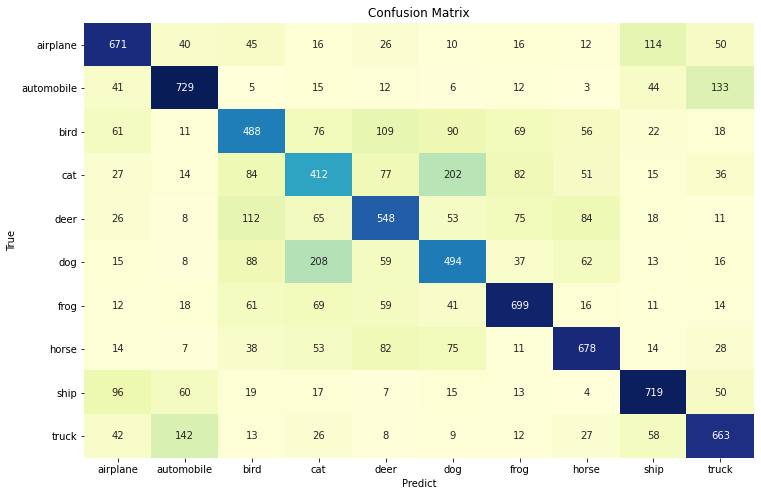

In [ ]:
labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck',
          ]

plt.subplots( figsize = ( 12, 8 ) )
sns.heatmap( cm, cmap = 'YlGnBu', annot = True, fmt = 'd', cbar = False, xticklabels = labels, yticklabels = labels )
plt.title( 'Confusion Matrix' ) 
plt.xlabel( 'Predict' )
plt.ylabel( 'True' )